**Mini Project - Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).**

In [53]:
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import statistics

In [2]:
# importing the data

import os
for dirname, _, filenames in os.walk('gender_subṁission.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# making a copy of the dataset

train_df = train.copy()
test_df = test.copy()
test_lgdf = test.copy()
test_rfdf = test.copy()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.shape

(418, 11)

In [8]:
train_df[train_df['Sex'].str.match("male")].Sex.count() 

577

In [9]:
train_df[train_df['Sex'].str.match("female")].Sex.count()

314

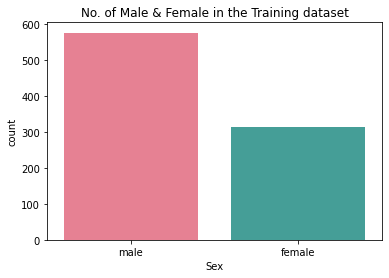

In [10]:
# No. of Male & Female in the Training dataset
# There are 577 male and 314 female passengers

sns.countplot(x='Sex',data=train_df,palette='husl').set_title('No. of Male & Female in the Training dataset');

In [11]:
test_df[test_df['Sex'].str.match("male")].Sex.count() 

266

In [12]:
test_df[test_df['Sex'].str.match("female")].Sex.count() 

152

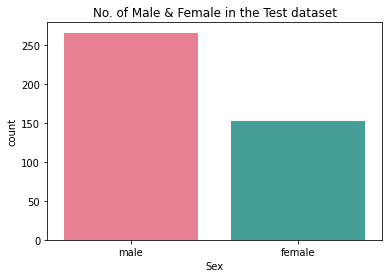

In [13]:
# No. of Male & Female in the Test dataset
# There are 266 male and 152 female passengers

sns.countplot(x='Sex',data=test_df,palette='husl').set_title('No. of Male & Female in the Test dataset');

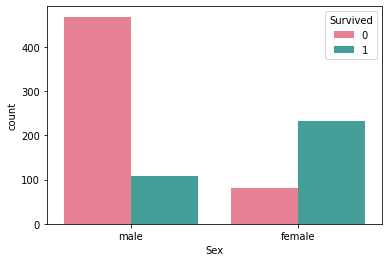

In [14]:
# This barplot shows that women have a higher survival rate compared to men. 

sns.countplot(x='Sex',data=train_df,hue='Survived',palette='husl');

# 0 = Not Survived 
# 1 = Survived

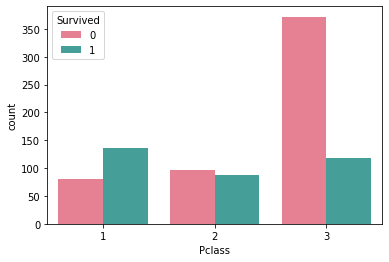

In [15]:
# This barplot shows that survival rate of Pclass 2 is the highest among the 3 classes

sns.countplot(x='Pclass',data=train_df,hue='Survived',palette='husl');

In [16]:
# Computing the Survival %
# Survival rate is only 38.4% of total passengers.

train_df['Survived'].value_counts() *100/len(train_df)

# 0 = Not Survived 
# 1 = Survived 

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [17]:
# Checking for null values

# In the train dataset, there are missing values in Age, Cabin & Embarked 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# In the test dataset, there are missing values in Age, Cabin & Fare
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
# Handling null values - Age
# Filling in the missing values with random numbers computed based on mean

train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_lgdf['Age'].fillna(test_lgdf['Age'].mean(), inplace=True)

In [20]:
# Handling null values - Fare
# Filling in the missing values with random numbers computed based on mean

train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_lgdf['Fare'].fillna(test_lgdf['Fare'].mean(), inplace=True)

In [21]:
# Dropping irrelevant columns 

train_df = train_df.drop(['PassengerId', 'Name', 'Embarked', 'Ticket','Cabin'], axis=1)
test_lgdf = test_lgdf.drop(['PassengerId', 'Name', 'Embarked', 'Ticket','Cabin'], axis=1)

In [22]:
# Changing 'Sex' from object to int

def change_int(sex):
    if sex == "male":
        return 1
    elif sex == 'female':
        return 0
    
train_df['Sex'] = train_df['Sex'].apply(change_int)
test_df['Sex'] = test_df['Sex'].apply(change_int)
test_lgdf['Sex'] = test_lgdf['Sex'].apply(change_int)
test_rfdf['Sex'] = test_rfdf['Sex'].apply(change_int)

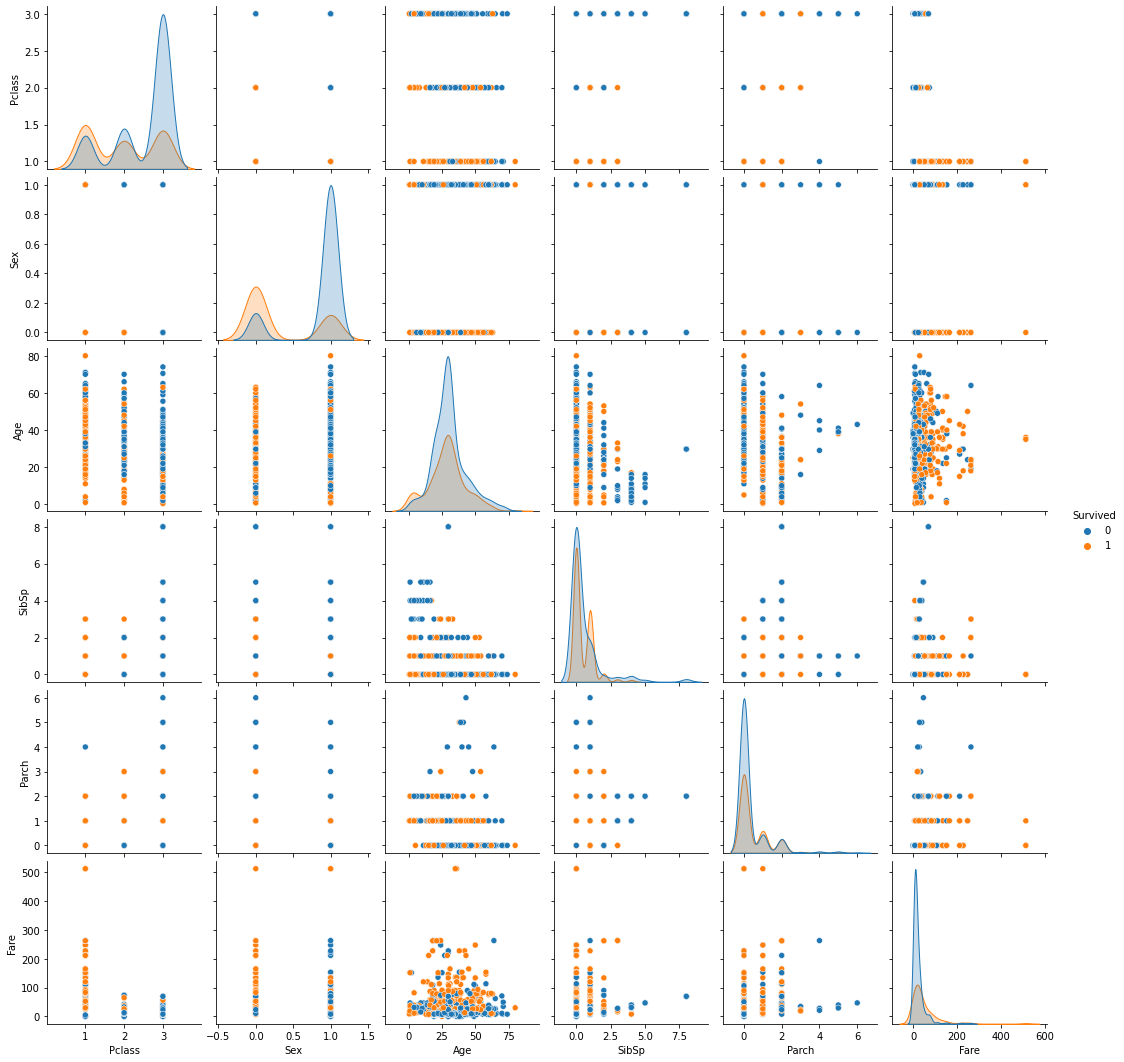

In [23]:
#Explore relationship between all variables
sns.pairplot(train_df, hue='Survived')

In [24]:
data = [train_df, test_lgdf]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

<AxesSubplot:>

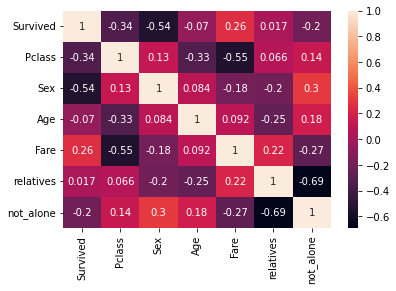

In [25]:
sns.heatmap(train_df.drop(['SibSp','Parch'], axis = 1).corr(),annot=True)

In [26]:
#Dropping irrelevant columns
X = train_df.drop(['Survived','SibSp','Parch','not_alone'], axis = 1)
y = train_df['Survived']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Sex        891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   relatives  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [33]:
# fit a logistic regression model and store the predictions

lg = LogisticRegression()
lg_titanic_model = lg.fit(X_train, y_train)

In [34]:
y_pred_test = lg.predict(X_test)
acc_lg = lg.score(X_test, y_test)
acc_lg

0.7947761194029851

In [35]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_test_rfc = rfc.predict(X_test)

In [36]:
acc_rfc = rfc.score(X_test, y_test)
acc_rfc

0.7761194029850746

In [43]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'n_estimators': [50,100,200,300,400,500,600]
}

rfc2 = GridSearchCV(estimator = rfc, cv=10,param_grid = param_grid, n_jobs = -1, verbose = 2, return_train_score=True)

rfc2.fit(X_train, y_train);

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


In [44]:
acc_rfc2 = rfc2.score(X_test, y_test)
acc_rfc2

0.7947761194029851

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

y_pred_test_knn = knn.predict(X_test)

acc_knn = knn.score(X_test,y_test)
acc_knn


0.7164179104477612

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Score': [acc_lg, acc_rfc2, acc_knn]})
models.sort_values(by='Score', ascending=False)

display(models)

,Model,Score
0,Logistic Regression,0.794776
1,Random Forest,0.794776
2,KNN,0.716418


In [47]:
X = test_lgdf.drop(['SibSp','Parch','not_alone'], axis = 1)

X.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
relatives    0
dtype: int64

In [48]:
test_lgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   relatives  418 non-null    int64  
 7   not_alone  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [49]:
y_pred_test_rfc2 = rfc2.predict(X)
y_pred_test_rfc2

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_test_rfc2})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
submission = pd.DataFrame({'Name': test_df['Name'], 'Survived': y_pred_test_rfc2})
submission

,Name,Survived
0,"Kelly, Mr. James",0
1,"Wilkes, Mrs. James (Ellen Needs)",0
2,"Myles, Mr. Thomas Francis",0
3,"Wirz, Mr. Albert",0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1
...,...,...
413,"Spector, Mr. Woolf",0
414,"Oliva y Ocana, Dona. Fermina",1
415,"Saether, Mr. Simon Sivertsen",0
416,"Ware, Mr. Frederick",0


In [52]:
submission.to_csv('submission.csv',index=False)